# Section 6. Newton's method

#### (a) Consider the equation $ln(x) = (x-4)^2 - 1$

> ##### (a) Prove that the equation has exactly *two* positive solutions

Roots of f': [2 - 3*sqrt(2)/2, 2 + 3*sqrt(2)/2]
Root number 1 stated numerically: -0.121320343559643
Root number 2 stated numerically: 4.12132034355964
Root of f' stated numerically: 4.12132034355964


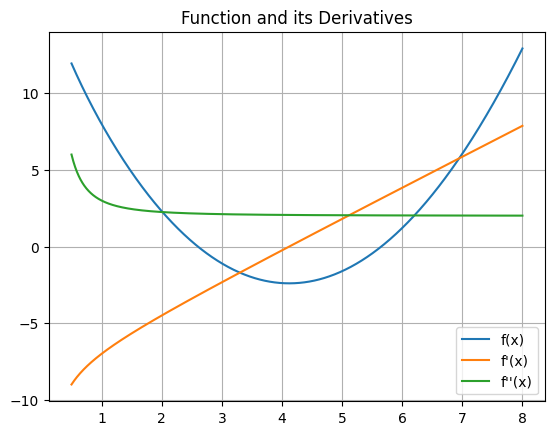

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import sympy

x = sympy.symbols('x')

f_of_x = (-sympy.log(x)) + ((x - 4) ** 2) - 1
f_prime_of_x = sympy.diff(f_of_x, x) 
f_prime_prime_of_x = sympy.diff(f_prime_of_x, x)

# Lambdify the symbolic expressions to numerical functions
f_of_x_func = sympy.lambdify(x, f_of_x, 'numpy')
f_prime_of_x_func = sympy.lambdify(x, f_prime_of_x, 'numpy')
f_prime_prime_of_x_func = sympy.lambdify(x, f_prime_prime_of_x, 'numpy')


x_values = np.linspace(0.5, 8.0, 1000)

y_values = f_of_x_func(x_values)
y_prime_values = f_prime_of_x_func(x_values)
y_prime_prime_values = f_prime_prime_of_x_func(x_values)

f_prime_of_x_roots = sympy.solve(f_prime_of_x, x)
print(f"Roots of f': {f_prime_of_x_roots}")
for index, item in enumerate(f_prime_of_x_roots, 1):
    print(f'Root number {index} stated numerically: {item.evalf()}')
print(f"Root of f' stated numerically: {f_prime_of_x_roots[1].evalf()}")

plt.plot(x_values, y_values, label="f(x)")
plt.plot(x_values, y_prime_values, label="f'(x)")
plt.plot(x_values, y_prime_prime_values, label="f''(x)")
plt.legend() 
plt.title("Function and its Derivatives")
plt.grid(True)
plt.show()

Let $f(x)=(x-4)^2-1-ln(x) \Rightarrow f'(x)=2x^2-8x-1 \Rightarrow f''(x)=x^{-2}+2$

We can see the derivative crossing the x-axis only once, if we zoom out further, we'd see that $f'(x)$ is increasing from $x \approx 4.12$, we can also see that $f(x)$ is crossing the x-axis twice, for $f'(x)$ there's two roots, but, $ln(x)$ is *undefined* for $x \leq 0$ 

We could prove that there's no other roots to $f'(x)$ but, sympy has already told us otherwise. To borrow from work I've done previously, and tossing out the errogenous root, we know that as $f'(x)$ only crosses the x-axis once in the interval, we know we have at most two roots

$\blacksquare$ There are at most two roots in the interval

    

#### $(ii)$ Let $\alpha$ be the smaller of the two solutions. Use Newton's Method to find an approximation of $\alpha$ with an absolute error of less than $10^{-3}$

In [31]:
from typing import Callable, Optional

def newtons_method(
        fOfX : Callable[[float], float],
        dfOfX : Callable[[float], float],
        guess : float,
        maxIterations : int = 100,
        maxError : float = 1e-6) -> Optional[float]:

    def formula() -> float:
        return guess - (fOfX(guess) / dfOfX(guess))

    if maxIterations == 0 and fOfX(guess) > maxError:
        return None
    elif fOfX(guess) < maxError:
        return guess
    else:
        return newtons_method(fOfX, dfOfX, formula(), maxIterations - 1, maxError)

f_of_x = lambda x : (-np.log(x)) + ((x - 4) ** 2) - 1
f_prime_of_x = lambda x : 2 * (x ** 2) - (8 * x) - 1
guess = newtons_method(
    fOfX = f_of_x,
    dfOfX = f_prime_of_x,
    guess = 1
)

print(f'Root at ({guess}, {f_of_x(guess)})')

Root at (2.601409918180815, 6.426907868117837e-07)


We can look at the graph before for a quick double check, this seems totally reasonable, the root is at $x \approx 2.6$